In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
filename = 'P:/CoxaAI/preprocess_data/csv_detection_info/sortering 2/DD.csv'
filename_clean = 'P:/CoxaAI/preprocess_data/csv_detection_info_clean/sortering 2/DD.csv'
saved_cropped_image = 'P:/CoxaAI/preprocess_data/cropped/sortering 2/DD'

In [3]:
detection_df = pd.read_csv(filename)

In [4]:
detection_df

base_path  \
0    P:/CoxaAI/Sortering 2/DD   
1    P:/CoxaAI/Sortering 2/DD   
2    P:/CoxaAI/Sortering 2/DD   
3    P:/CoxaAI/Sortering 2/DD   
4    P:/CoxaAI/Sortering 2/DD   
..                        ...   
199  P:/CoxaAI/Sortering 2/DD   
200  P:/CoxaAI/Sortering 2/DD   
201  P:/CoxaAI/Sortering 2/DD   
202  P:/CoxaAI/Sortering 2/DD   
203  P:/CoxaAI/Sortering 2/DD   

                                              filename parent_name  \
0    1.2.276.0.95.15181.1.20230306.161502.0.2.1550.dcm  1-22041783   
1    1.2.276.0.95.15181.1.20230306.161502.0.2.1550.dcm  1-22041783   
2    1.2.276.0.95.15181.1.20230306.161554.0.2.1552.dcm  1-22041783   
3    1.2.276.0.95.15181.1.20230306.161554.0.2.1552.dcm  1-22041783   
4    1.2.840.114387.3079299573.58214.20090.36769.25...  1-22078454   
..                                                 ...         ...   
199  1.2.276.0.95.31583.1.20230329.142732.0.2.7422.dcm  1-23028177   
200  1.2.276.0.95.31583.1.20230329.143009.0.2.7424.dcm  1-23028177   
201  1.2.276.0.95.31583.1.20230329.143009.0.2.7424.dcm  1-23028177   
202  1.2.826.0.1.3680043.2.876.6680.1.2.3.201803211...  1-23028474   
203  1.2.826.0.1.3680043.2.876.6680.1.2.3.201803211...  1-23028474   

                                             crop_name  ax0_min  ax0_max  \
0    1.2.276.0.95.15181.1.20230306.161502.0.2.1550....     1025     1172   
1    1.2.276.0.95.15181.1.20230306.161502.0.2.1550....      993     1137   
2    1.2.276.0.95.15181.1.20230306.161554.0.2.1552....      998     1141   
3    1.2.276.0.95.15181.1.20230306.161554.0.2.1552....     1005     1155   
4    1.2.840.114387.3079299573.58214.20090.36769.25...     1135     1337   
..                                                 ...      ...      ...   
199  1.2.276.0.95.31583.1.20230329.142732.0.2.7422....      922     1085   
200  1.2.276.0.95.31583.1.20230329.143009.0.2.7424....      929     1089   
201  1.2.276.0.95.31583.1.20230329.143009.0.2.7424....      937     1090   
202  1.2.826.0.1.3680043.2.876.6680.1.2.3.201803211...      929     1089   
203  1.2.826.0.1.3680043.2.876.6680.1.2.3.201803211...      937     1090   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  
0       1088     1203    0.650546       False          3            DD  
1        522      636    0.587066       False          3            DD  
2        557      669    0.668169       False          3            DD  
3       1122     1232    0.556867       False          3            DD  
4       1473     1620    0.910714       False          3            DD  
..       ...      ...         ...         ...        ...           ...  
199     1433     1550    0.997671       False          3            DD  
200     1490     1605    0.998606       False          3            DD  
201      935     1047    0.995506       False          3            DD  
202     1490     1605    0.000000        True          3            DD  
203      935     1047    0.000000        True          3            DD  

[204 rows x 12 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [5]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [6]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([14, 15, 21, 202, 203], dtype='int64')

Note that there some cases that are not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [7]:
# plot every 9 of them

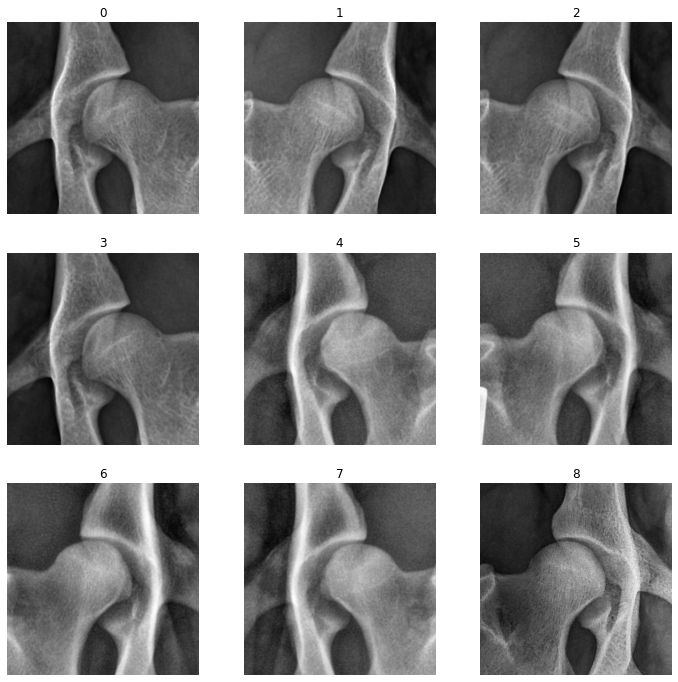

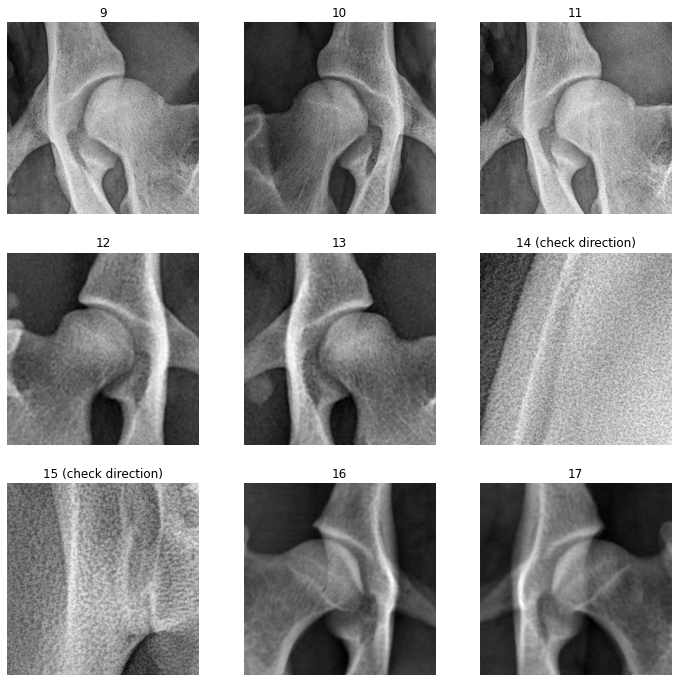

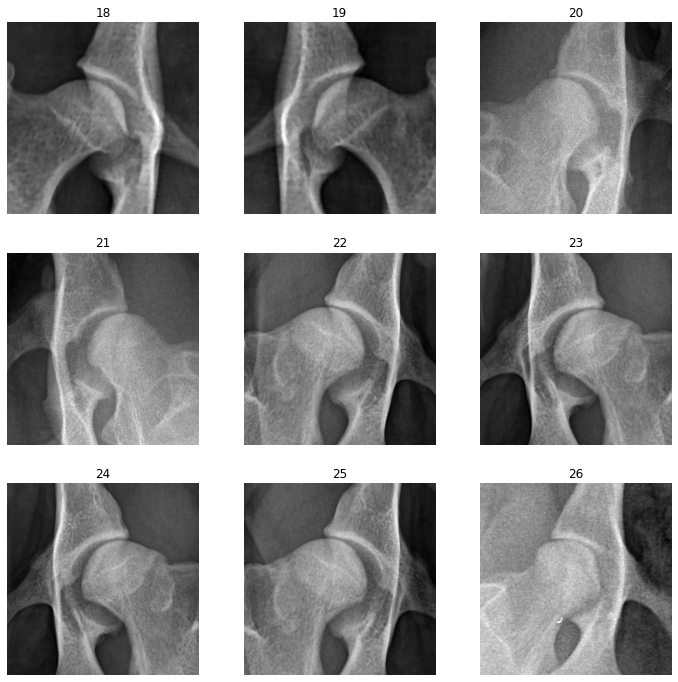

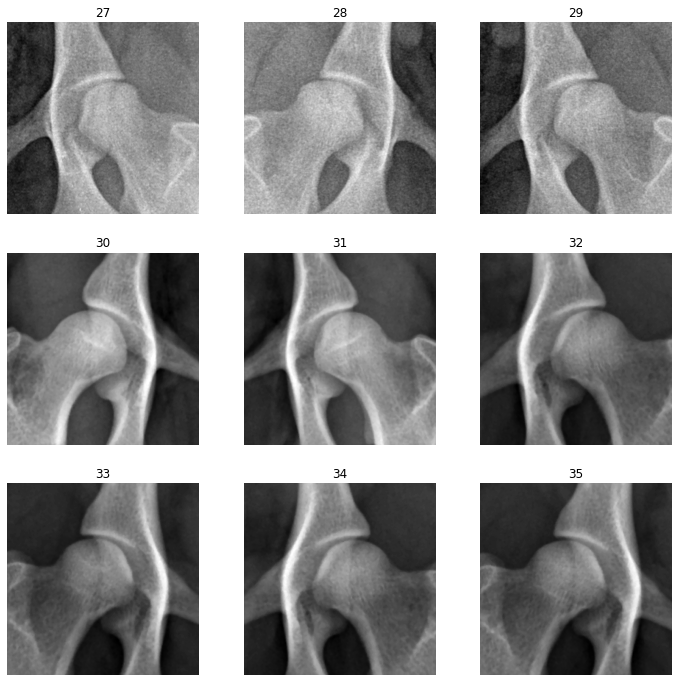

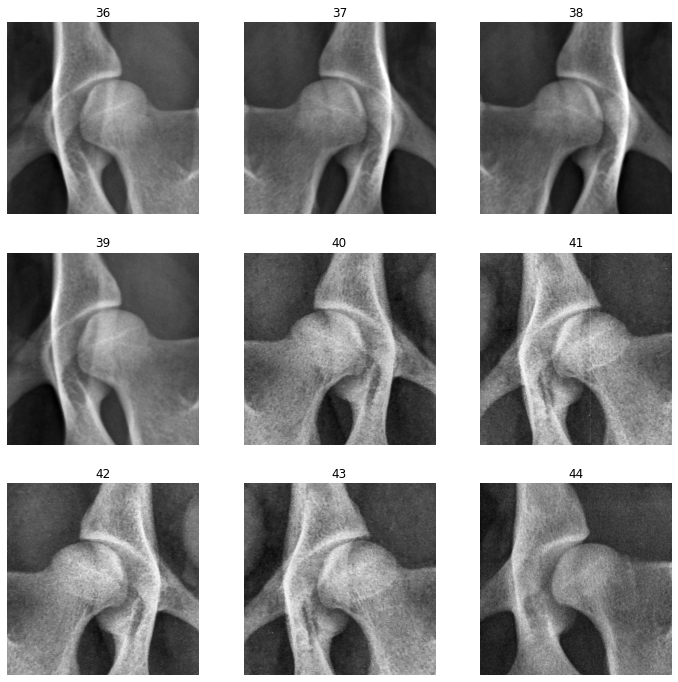

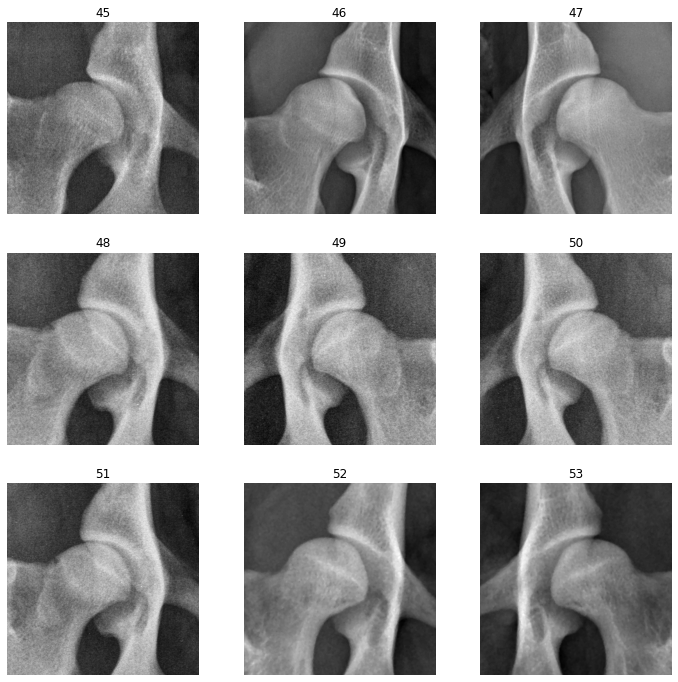

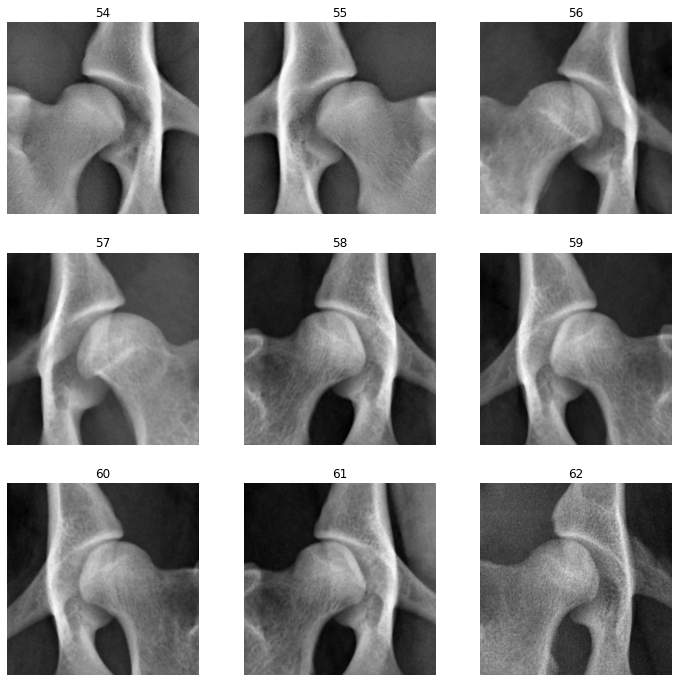

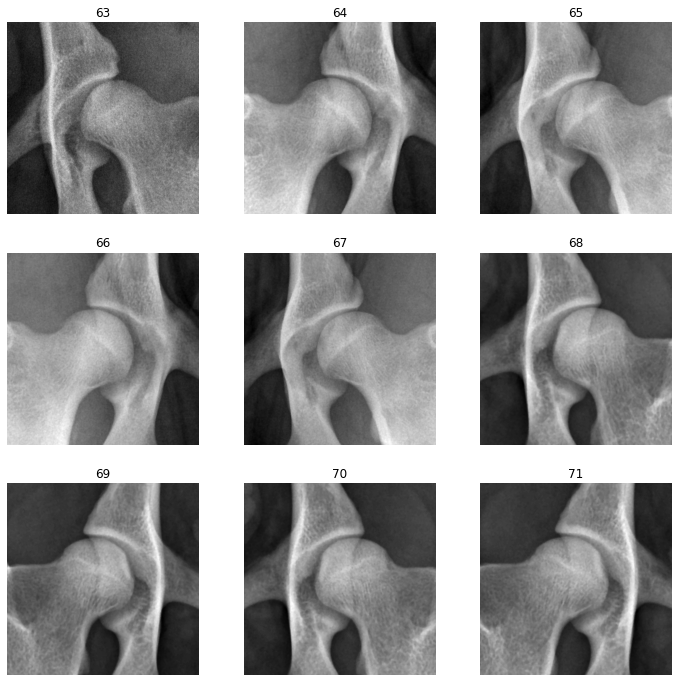

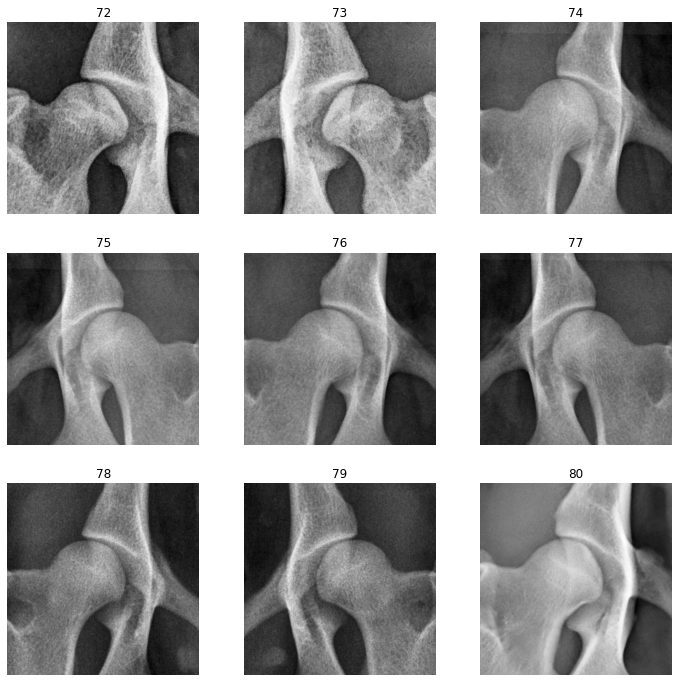

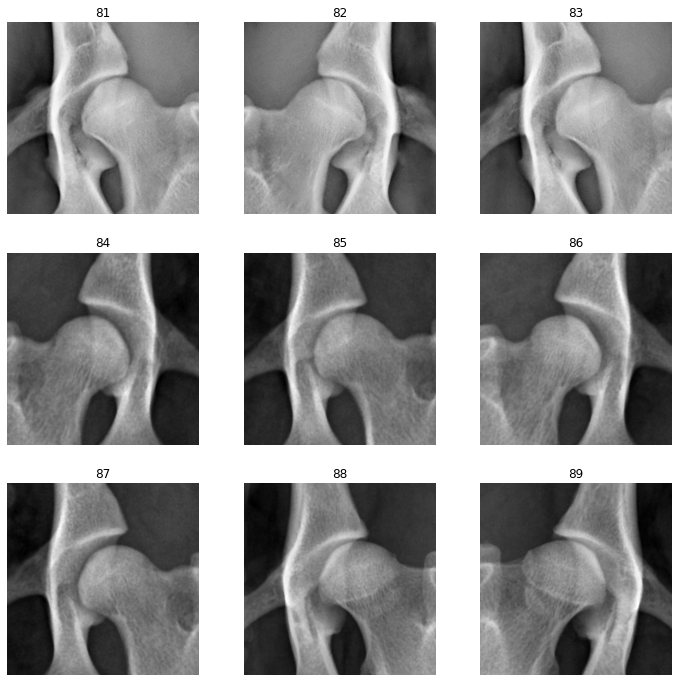

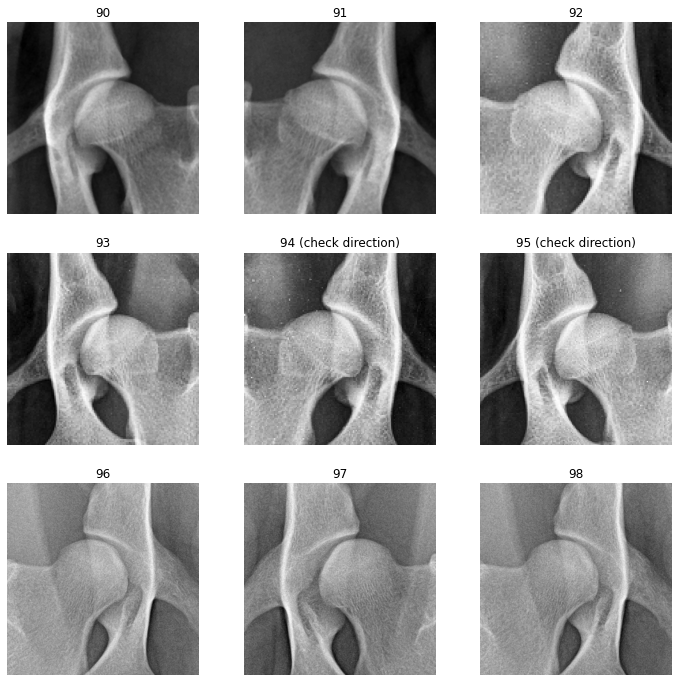

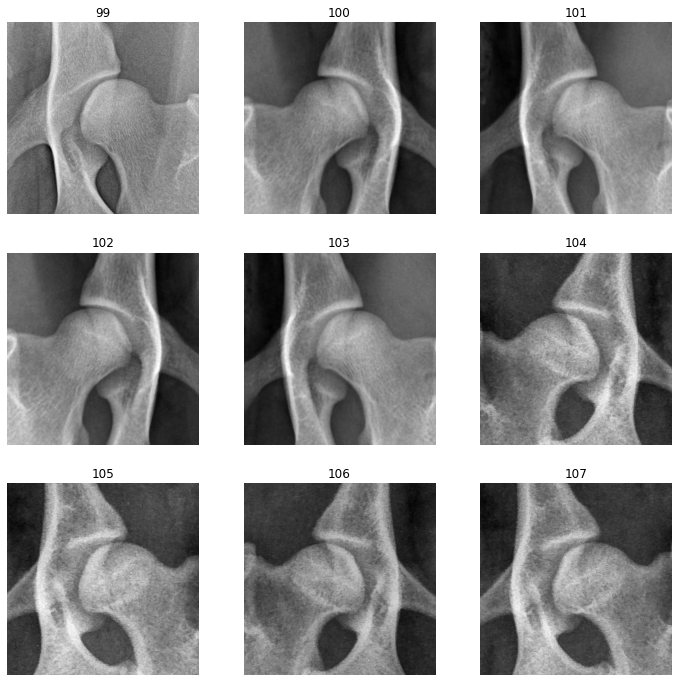

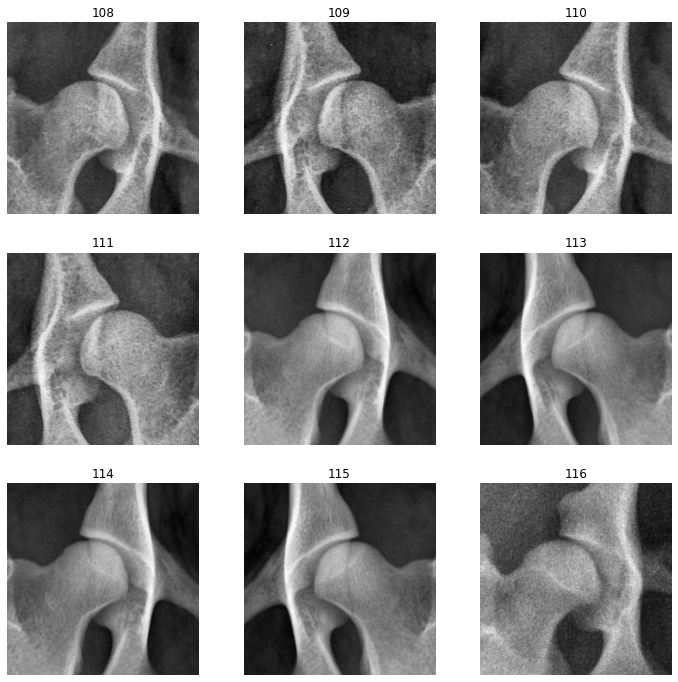

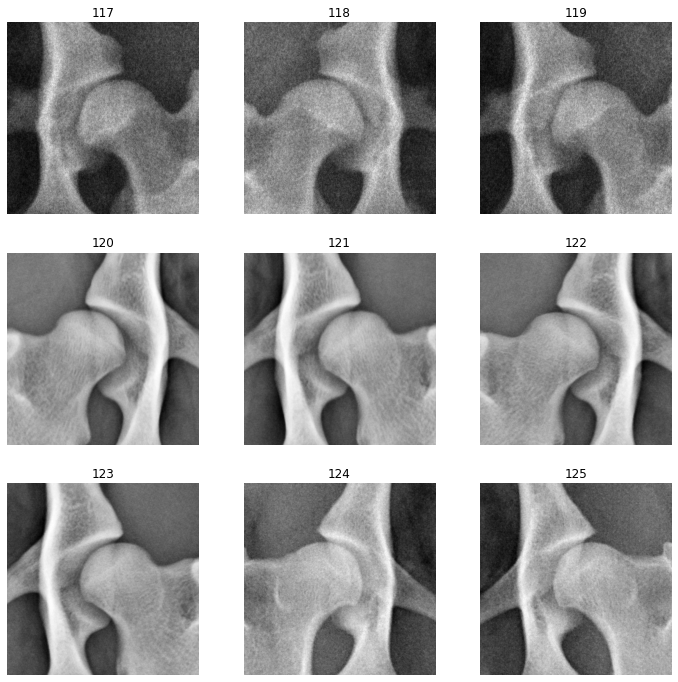

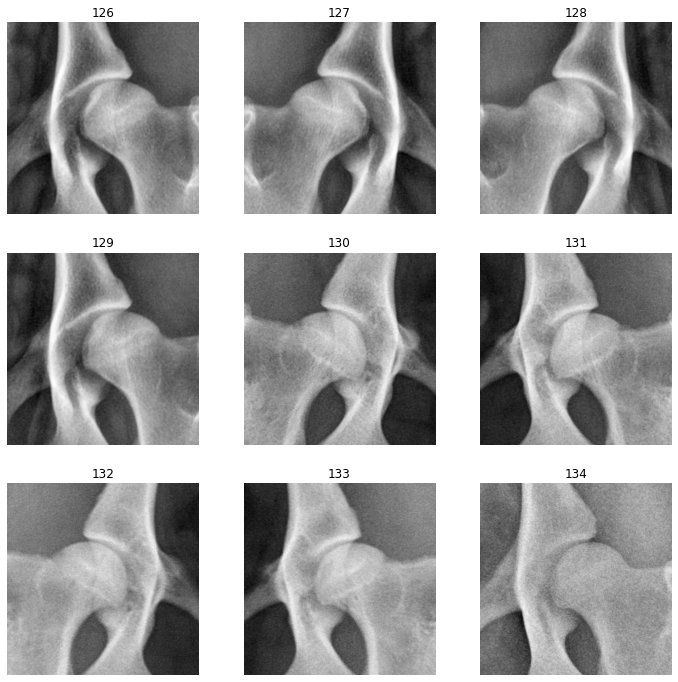

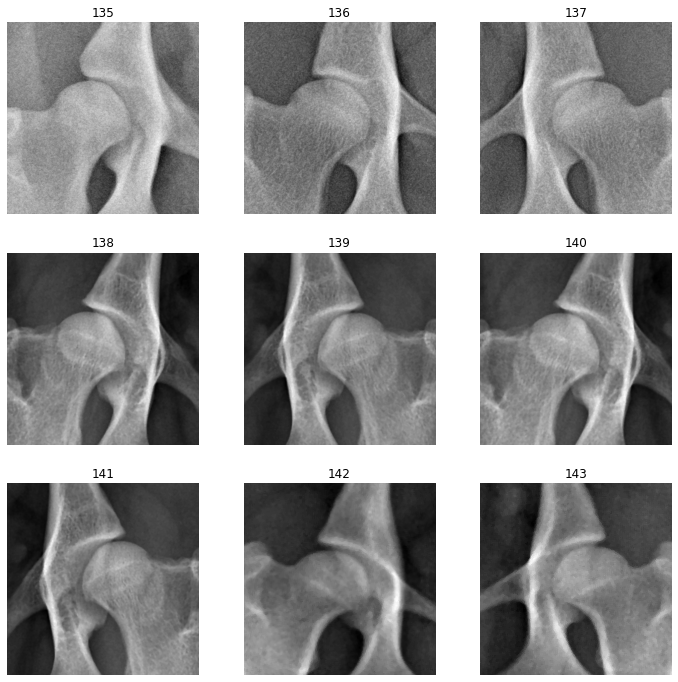

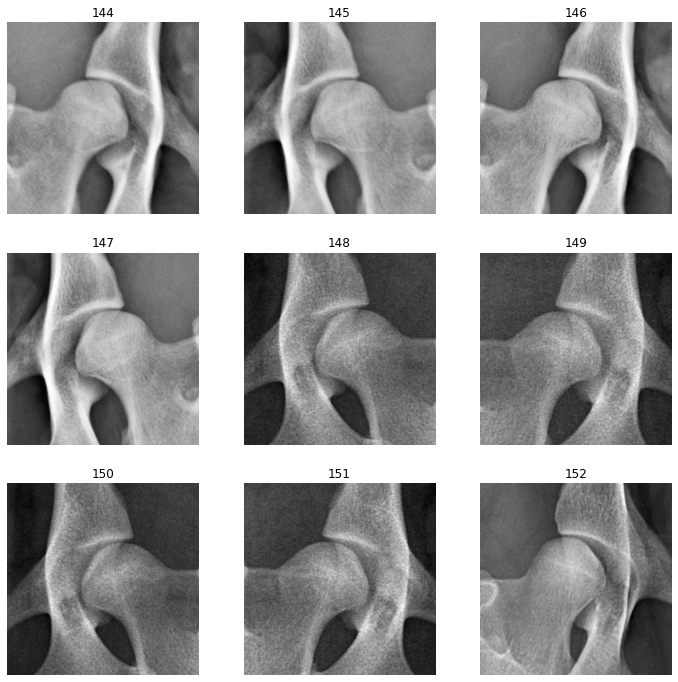

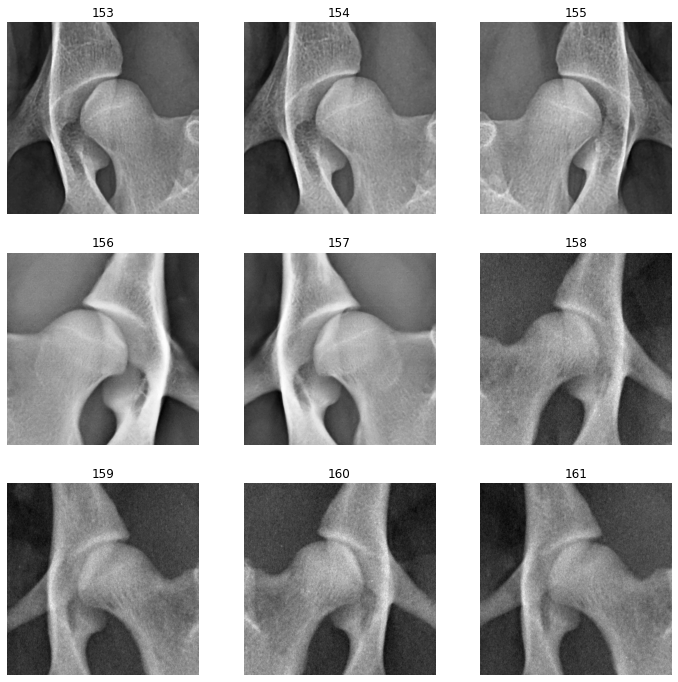

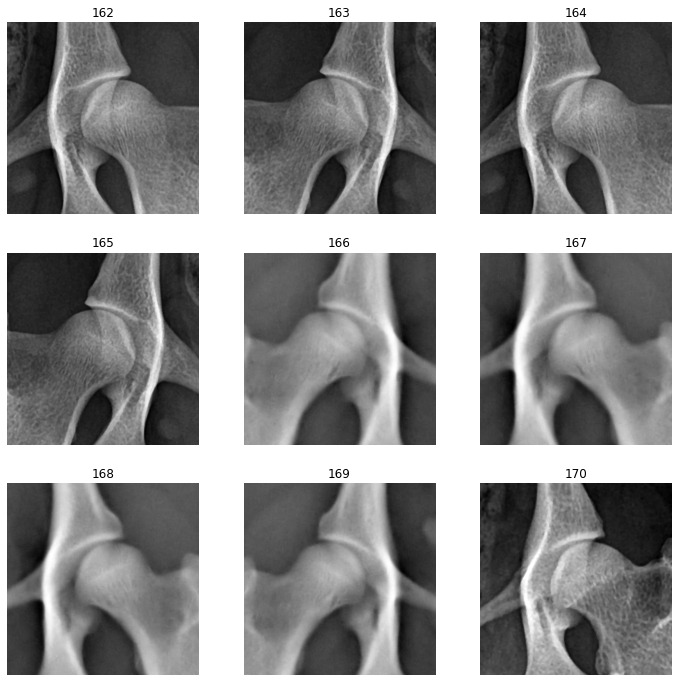

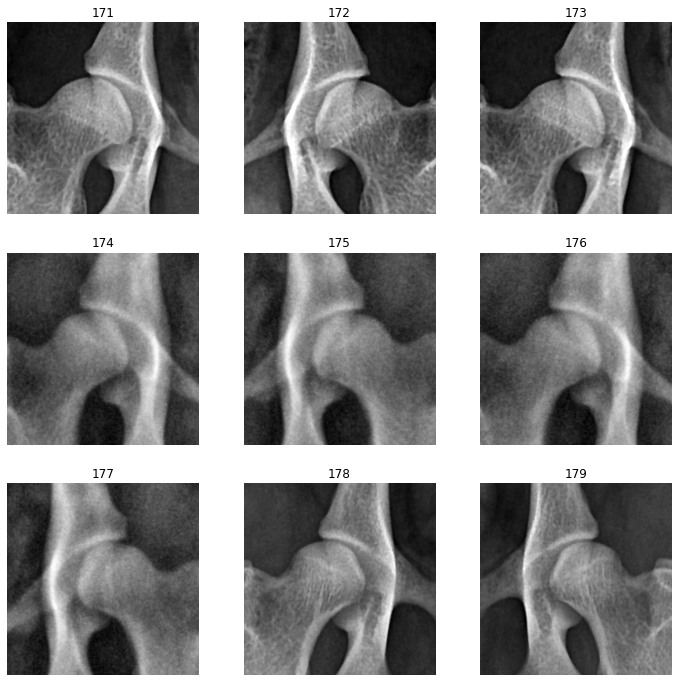

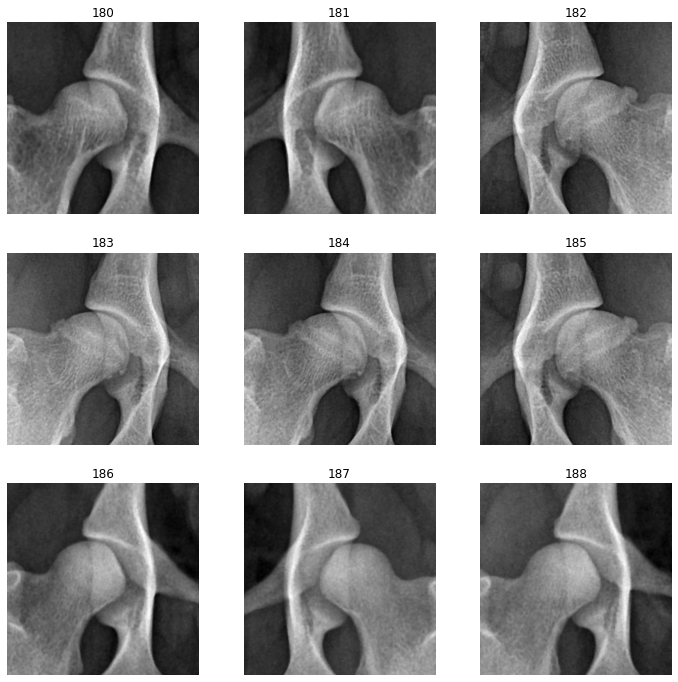

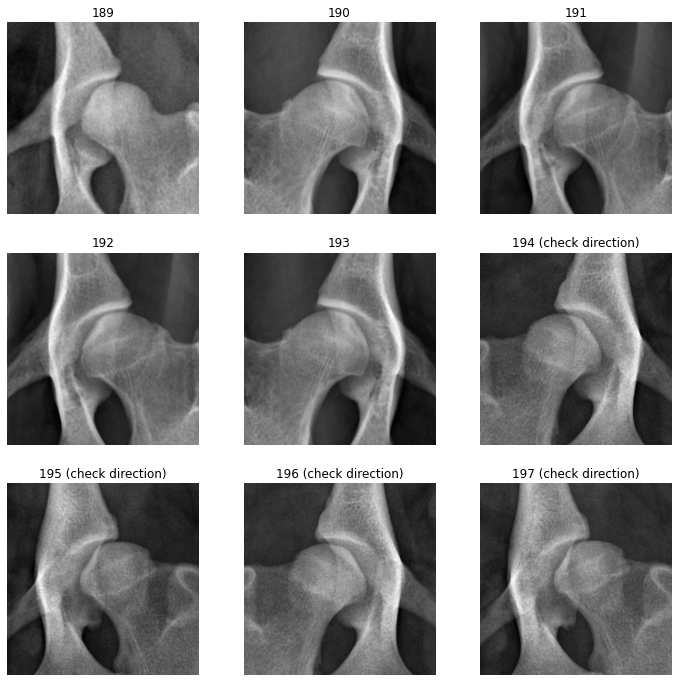

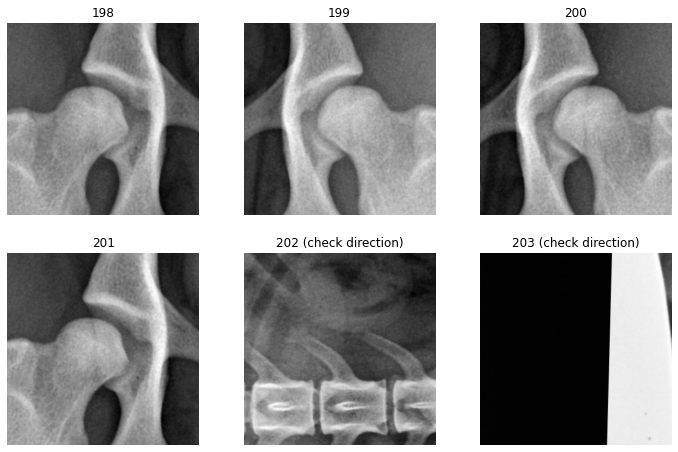

In [8]:
for id, item in detection_df.iterrows():
    fn = item['crop_name']
    img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    suffix = ' (check direction)' if item['is_rotated'] else ''
#     parent = item['parent_name']
#     if not pd.isnull(parent):
#         img = np.load(os.path.join(saved_cropped_image, parent,fn + '.npy'))
#     else:
#         img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id)+suffix)

    if (id%9) == 8:
        plt.show()                    
        
plt.show()

## Assign "flipped" column before removing failed predictions

In [9]:
flipped = np.array([False] * detection_df.shape[0])
flipped_indice = []
flipped[detection_df.index.isin(flipped_indice)] = True
detection_df['flipped'] = flipped

## Remove bad detection items

In [10]:
remove_indice = [14, 15, 202, 203]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    P:/CoxaAI/Sortering 2/DD   
1    P:/CoxaAI/Sortering 2/DD   
2    P:/CoxaAI/Sortering 2/DD   
3    P:/CoxaAI/Sortering 2/DD   
4    P:/CoxaAI/Sortering 2/DD   
..                        ...   
197  P:/CoxaAI/Sortering 2/DD   
198  P:/CoxaAI/Sortering 2/DD   
199  P:/CoxaAI/Sortering 2/DD   
200  P:/CoxaAI/Sortering 2/DD   
201  P:/CoxaAI/Sortering 2/DD   

                                              filename parent_name  \
0    1.2.276.0.95.15181.1.20230306.161502.0.2.1550.dcm  1-22041783   
1    1.2.276.0.95.15181.1.20230306.161502.0.2.1550.dcm  1-22041783   
2    1.2.276.0.95.15181.1.20230306.161554.0.2.1552.dcm  1-22041783   
3    1.2.276.0.95.15181.1.20230306.161554.0.2.1552.dcm  1-22041783   
4    1.2.840.114387.3079299573.58214.20090.36769.25...  1-22078454   
..                                                 ...         ...   
197  1.2.276.0.95.15181.1.20230405.134913.0.2.7021.dcm  1-23028094   
198  1.2.276.0.95.31583.1.20230329.142732.0.2.7422.dcm  1-23028177   
199  1.2.276.0.95.31583.1.20230329.142732.0.2.7422.dcm  1-23028177   
200  1.2.276.0.95.31583.1.20230329.143009.0.2.7424.dcm  1-23028177   
201  1.2.276.0.95.31583.1.20230329.143009.0.2.7424.dcm  1-23028177   

                                             crop_name  ax0_min  ax0_max  \
0    1.2.276.0.95.15181.1.20230306.161502.0.2.1550....     1025     1172   
1    1.2.276.0.95.15181.1.20230306.161502.0.2.1550....      993     1137   
2    1.2.276.0.95.15181.1.20230306.161554.0.2.1552....      998     1141   
3    1.2.276.0.95.15181.1.20230306.161554.0.2.1552....     1005     1155   
4    1.2.840.114387.3079299573.58214.20090.36769.25...     1135     1337   
..                                                 ...      ...      ...   
197  1.2.276.0.95.15181.1.20230405.134913.0.2.7021....     1019     1223   
198  1.2.276.0.95.31583.1.20230329.142732.0.2.7422....      928     1084   
199  1.2.276.0.95.31583.1.20230329.142732.0.2.7422....      922     1085   
200  1.2.276.0.95.31583.1.20230329.143009.0.2.7424....      929     1089   
201  1.2.276.0.95.31583.1.20230329.143009.0.2.7424....      937     1090   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  \
0       1088     1203    0.650546       False          3            DD   
1        522      636    0.587066       False          3            DD   
2        557      669    0.668169       False          3            DD   
3       1122     1232    0.556867       False          3            DD   
4       1473     1620    0.910714       False          3            DD   
..       ...      ...         ...         ...        ...           ...   
197     1900     2052    0.747197        True          3            DD   
198      882      995    0.998556       False          3            DD   
199     1433     1550    0.997671       False          3            DD   
200     1490     1605    0.998606       False          3            DD   
201      935     1047    0.995506       False          3            DD   

     flipped  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
197    False  
198    False  
199    False  
200    False  
201    False  

[200 rows x 13 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
exclude_ids = pd.read_csv('exclude_id.csv').id.values
new_detection_df = new_detection_df[~new_detection_df.parent_name.isin(exclude_ids)]
print(new_detection_df.shape)

(200, 13)


In [13]:
new_detection_df.to_csv(filename_clean, index=False)

In [14]:
detection_df[detection_df.index.isin(remove_indice)]

base_path  \
14   P:/CoxaAI/Sortering 2/DD   
15   P:/CoxaAI/Sortering 2/DD   
202  P:/CoxaAI/Sortering 2/DD   
203  P:/CoxaAI/Sortering 2/DD   

                                              filename parent_name  \
14          1.2.826.0.1.3680043.2.855.1677225190.1.dcm  1-23009318   
15          1.2.826.0.1.3680043.2.855.1677225190.1.dcm  1-23009318   
202  1.2.826.0.1.3680043.2.876.6680.1.2.3.201803211...  1-23028474   
203  1.2.826.0.1.3680043.2.876.6680.1.2.3.201803211...  1-23028474   

                                             crop_name  ax0_min  ax0_max  \
14       1.2.826.0.1.3680043.2.855.1677225190.1.dcm_h1      682      802   
15       1.2.826.0.1.3680043.2.855.1677225190.1.dcm_h2      686      808   
202  1.2.826.0.1.3680043.2.876.6680.1.2.3.201803211...      929     1089   
203  1.2.826.0.1.3680043.2.876.6680.1.2.3.201803211...      937     1090   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  \
14       482      570         0.0        True          3            DD   
15       955     1046         0.0        True          3            DD   
202     1490     1605         0.0        True          3            DD   
203      935     1047         0.0        True          3            DD   

     flipped  
14     False  
15     False  
202    False  
203    False